In [1]:
import openbabel
from openbabel import pybel
import csv,sys
import pandas as pd
import numpy as np

In [2]:
# The functional group distribution is analysed in a similar fashion as used by 
# S. Boobier, D. R. J. Hose, A. J. Blacker and B. N. Nguyen, Nat Commun, 2020, 11, 5753.
# https://doi.org/10.1038/s41467-020-19594-z
# the core code to count functional groups can be found in the ESI of the publication 

#get SMARTS and Dataset
#file with column called “FG” with list of FGs to analyse, and column called “SMARTS” of SMARTS codes
SMARTS1=pd.read_csv('/Users/jiayun/Documents/work/outliers/SMARTS.csv') 

In [3]:
SMARTS1['SMARTS']

0                                           [F,Cl,Br,I]
1                                                   [F]
2                                                  [Cl]
3                                                  [Br]
4                                                   [I]
5                                           [CX3]=[OX1]
6                                     [#6][CX3](=O)[#6]
7                                       [CX3H1](=O)[#6]
8                                [NX3][CX3](=[OX1])[#6]
9                              [#6][CX3](=O)[OX2H0][#6]
10                                     [CX3](=O)[OX2H1]
11    [$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([...
12                                         [$([CX2]#C)]
13                     [$([cX3](:*):*),$([cX2+](:*):*)]
14                                          [NX1]#[CX2]
15                                 [NX3;H2,H1;!$(NC=O)]
16              [$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]
17                                          [NX2

In [4]:
#load dataset 
fps_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/fps_xgboost_h_outliers2.csv')
m2v_xgb_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/m2v_xgboost_h_outliers2.csv')
bert_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert_h_outliers2.csv')
bert2_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert2_h_outliers2.csv')

In [5]:
fps_d2

,Unnamed: 0,Unnamed: 0.1,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,116,116,679,680,679,OCCC#N,679,17.6,10.314026,-7.285974,-2.047614
1,121,121,721,722,721,CF,721,9.5,2.033365,-7.466635,-2.098386
2,122,122,723,724,723,C=O,723,15.4,7.227139,-8.172861,-2.296860
3,144,144,845,847,845,COO,845,30.0,11.101633,-18.898367,-5.311104
4,158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,15.549652,-8.550348,-2.402948
5,171,171,1010,1012,1010,Oc1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,1010,6.0,15.917940,9.917940,2.787289
6,177,177,1045,1047,1045,[nH]1cnc2ncncc12,1045,14.2,6.131119,-8.068881,-2.267638
7,178,178,1048,1050,1048,c1ccncc1,1048,5.9,13.355430,7.455430,2.095237
8,180,180,1079,1081,1079,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1079,13.8,27.792934,13.992934,3.932505
9,15,15,72,72,72,Oc1ccc(O)cc1,72,27.2,15.838763,-11.361237,-3.192906


In [6]:
m2v_xgb_d2

,Unnamed: 0,Unnamed: 0.1,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,18,18,113,113,113,CC1(O)CCCCC1,113,12.0,4.775449,-7.224551,-2.178811
1,29,29,198,198,198,OC1CCC=C1,198,15.6,5.370367,-10.229633,-3.085096
2,54,54,321,321,321,CC(=O)Nc1ccccc1,321,13.5,4.760143,-8.739857,-2.635803
3,86,86,497,497,497,C1CC1,497,0.0,6.666021,6.666021,2.010367
4,122,122,723,724,723,C=O,723,15.4,8.536138,-6.863862,-2.070033
5,123,123,732,733,732,OCC(O)CO.OC(O)=O,732,17.4,31.408684,14.008684,4.224798
6,124,124,733,734,733,CC(O)=O.OCC(O)CO.OC(O)=O,733,9.2,21.183853,11.983853,3.614141
7,144,144,845,847,845,COO,845,30.0,10.129034,-19.870966,-5.992770
8,158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,10.598709,-13.501291,-4.071777
9,180,180,1079,1081,1079,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1079,13.8,5.956008,-7.843992,-2.365624


In [7]:
bert_d2

,Unnamed: 0,Unnamed: 0.1,smiles,actual,predict,residual,std_residual
0,6,6,OCCC#N,17.6,6.049999,-11.550001,-3.607388
1,24,24,NCCO,21.0,6.498917,-14.501083,-4.529093
2,70,70,CC=NO,20.2,8.302810,-11.897190,-3.715824
3,134,134,S=C=S,0.6,9.518504,8.918504,2.785498
4,173,173,CCCCO,15.8,7.040967,-8.759033,-2.735690
...,...,...,...,...,...,...,...
68,75,75,OCCN1CCCC1=O,15.7,8.913386,-6.786614,-2.119649
69,79,79,BrC#N,0.0,6.453456,6.453456,2.015594
70,107,107,C1CCCCCCCCCCC1,0.0,7.269525,7.269525,2.270475
71,172,172,CCN=C=S,9.0,1.482540,-7.517460,-2.347912


In [8]:
bert2_d2

,Unnamed: 0,Unnamed: 0.1,smiles,exp,predict,residual,std_residual
0,0,0,SC#N,10.9,5.029569,-5.870431,-2.146044
1,19,19,C[P](F)(F)=O,8.4,-0.878434,-9.278434,-3.391901
2,70,70,CC=NO,20.2,13.505288,-6.694712,-2.447375
3,78,78,OC=O,14.0,22.777193,8.777193,3.208664
4,121,121,N,18.8,12.654545,-6.145455,-2.246584
...,...,...,...,...,...,...,...
60,61,61,CC(=O)Nc1ccc(O)cc1,13.9,20.411549,6.511549,2.380416
61,65,65,OC(=O)CS,20.0,13.867423,-6.132577,-2.241876
62,119,119,C1C=Cc2ccccc12,9.0,3.121525,-5.878475,-2.148984
63,175,175,OCCOCCOCCOC=C,6.6,13.030194,6.430194,2.350675


In [9]:
#outputfile
Output="FG_hansen_h_fps_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=fps_d2['SMILES']
fps_d2=np.array(fps_d2)
FG_list=[]

for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    
#for each molecule
for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)    

In [10]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,OCCC#N,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,CF,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,COO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,CN[C@@H](C)[C@H](O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
5,Oc1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
6,[nH]1cnc2ncncc12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7,c1ccncc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,Oc1ccc(O)cc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [11]:
FG_sum_fps_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_fps_d2_merge = (FG_sum_fps_d2.to_frame('fps_d2'))/len(fps_d2)

In [12]:
#outputfile
Output="FG_hansen_h_m2v_xgb_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=m2v_xgb_d2['SMILES']
m2v_xgb_d2=np.array(m2v_xgb_d2)
FG_list=[]

for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [13]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CC1(O)CCCCC1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,OC1CCC=C1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,CC(=O)Nc1ccccc1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,C1CC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C=O,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,OCC(O)CO.OC(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
6,CC(O)=O.OCC(O)CO.OC(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
7,COO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
8,CN[C@@H](C)[C@H](O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
9,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [14]:
FG_sum_m2v_xgb_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_m2v_xgb_d2_merge = (FG_sum_m2v_xgb_d2.to_frame('m2v_xgb_d2'))/len(m2v_xgb_d2)

In [15]:
#outputfile
Output="FG_hansen_h_bert_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert_d2['smiles']
bert_d2=np.array(bert_d2)
FG_list=[]

for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [16]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,OCCC#N,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,NCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,S=C=S,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,CCCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,OCCN1CCCC1=O,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
69,BrC#N,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
70,C1CCCCCCCCCCC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,CCN=C=S,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
FG_sum_bert_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert_d2_merge = (FG_sum_bert_d2.to_frame('bert_d2'))/len(bert_d2)

In [18]:
#outputfile
Output="FG_hansen_h_bert2_d2_v2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert2_d2['smiles']
bert2_d2=np.array(bert2_d2)
FG_list=[]

for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [19]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,SC#N,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,C[P](F)(F)=O,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,CC=NO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,OC=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
4,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,CC(=O)Nc1ccc(O)cc1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
61,OC(=O)CS,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,1,1
62,C1C=Cc2ccccc12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,OCCOCCOCCOC=C,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [20]:
FG_sum_bert2_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert2_d2_merge = (FG_sum_bert2_d2.to_frame('bert2_d2'))/len(bert2_d2)

In [21]:
FG_sum_bert2_d2_merge

,bert2_d2
Halides,0.138462
F,0.061538
Cl,0.076923
Br,0.000000
I,0.000000
Carbonyl,0.215385
Ketone,0.030769
Aldehyde,0.000000
Amide,0.046154
Ester,0.030769


In [22]:
FG_sum_hansen = pd.read_parquet('FG_sum_hansen.parquet')

In [23]:
FG_sum_fps_d2_merge ['m2v_xgb_d2'] =  FG_sum_m2v_xgb_d2_merge
FG_sum_fps_d2_merge ['bert_d2'] =  FG_sum_bert_d2_merge
FG_sum_fps_d2_merge ['bert2_d2'] =  FG_sum_bert2_d2_merge
FG_sum_fps_d2_merge ['hansen'] =  FG_sum_hansen/1183

In [24]:
FG_sum_fps_d2_merge

,fps_d2,m2v_xgb_d2,bert_d2,bert2_d2,hansen
Halides,0.122449,0.200000,0.136986,0.138462,0.252747
F,0.061224,0.054545,0.054795,0.061538,0.047337
Cl,0.020408,0.090909,0.041096,0.076923,0.174979
Br,0.040816,0.036364,0.027397,0.000000,0.040575
I,0.000000,0.018182,0.013699,0.000000,0.007608
Carbonyl,0.224490,0.218182,0.136986,0.215385,0.294167
Ketone,0.020408,0.000000,0.000000,0.030769,0.054100
Aldehyde,0.000000,0.000000,0.000000,0.000000,0.027050
Amide,0.040816,0.054545,0.027397,0.046154,0.024514
Ester,0.040816,0.018182,0.041096,0.030769,0.120034


Text(0, 0.5, 'Average occurance/molecule')

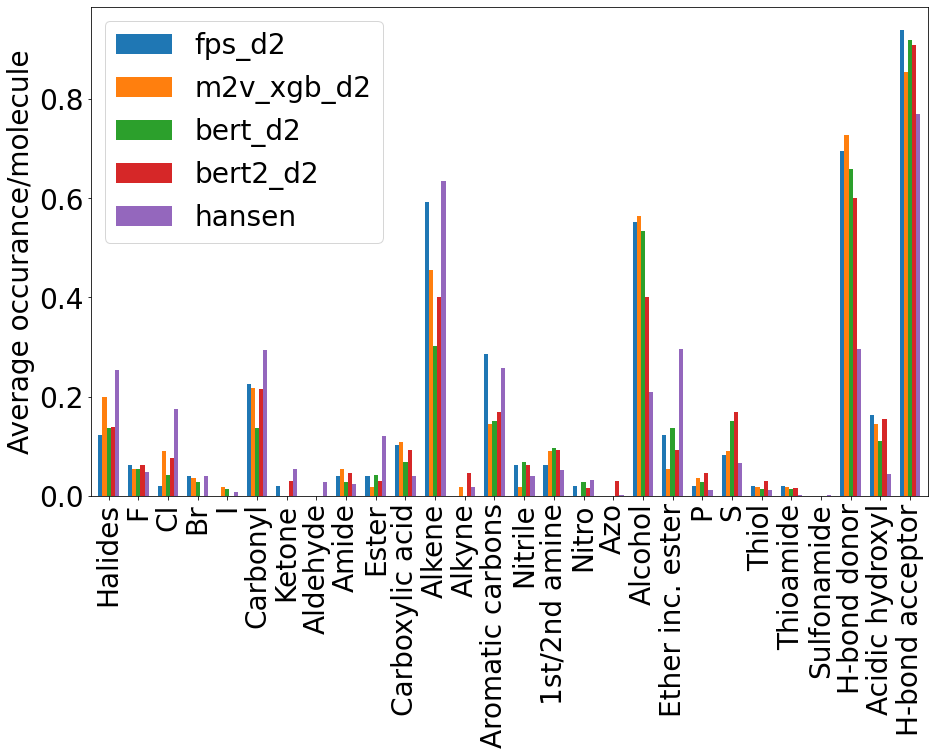

In [25]:
import matplotlib.pyplot as plt
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge.plot.bar(figsize=(15,9), width=0.7)
ax.set_ylabel("Average occurance/molecule", size=28)

In [26]:
FG_sum_fps_d2_merge['Morgan Fps'] = FG_sum_fps_d2_merge['fps_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['Mol2Vec/XGBoost'] = FG_sum_fps_d2_merge['m2v_xgb_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['ChemBerta_zinc_base_v1'] = FG_sum_fps_d2_merge['bert_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['ChemBerta_77M_MTR'] = FG_sum_fps_d2_merge['bert2_d2']-FG_sum_fps_d2_merge['hansen']

In [27]:
FG_sum_fps_d2_merge

,fps_d2,m2v_xgb_d2,bert_d2,bert2_d2,hansen,Morgan Fps,Mol2Vec/XGBoost,ChemBerta_zinc_base_v1,ChemBerta_77M_MTR
Halides,0.122449,0.200000,0.136986,0.138462,0.252747,-0.130298,-0.052747,-0.115761,-0.114286
F,0.061224,0.054545,0.054795,0.061538,0.047337,0.013887,0.007208,0.007457,0.014201
Cl,0.020408,0.090909,0.041096,0.076923,0.174979,-0.154571,-0.084070,-0.133883,-0.098056
Br,0.040816,0.036364,0.027397,0.000000,0.040575,0.000242,-0.004211,-0.013178,-0.040575
I,0.000000,0.018182,0.013699,0.000000,0.007608,-0.007608,0.010574,0.006091,-0.007608
Carbonyl,0.224490,0.218182,0.136986,0.215385,0.294167,-0.069678,-0.075986,-0.157181,-0.078783
Ketone,0.020408,0.000000,0.000000,0.030769,0.054100,-0.033692,-0.054100,-0.054100,-0.023331
Aldehyde,0.000000,0.000000,0.000000,0.000000,0.027050,-0.027050,-0.027050,-0.027050,-0.027050
Amide,0.040816,0.054545,0.027397,0.046154,0.024514,0.016302,0.030032,0.002883,0.021640
Ester,0.040816,0.018182,0.041096,0.030769,0.120034,-0.079217,-0.101852,-0.078938,-0.089265


In [28]:
FG_sum_fps_d2_merge_change = FG_sum_fps_d2_merge[['Morgan Fps', 'Mol2Vec/XGBoost', 'ChemBerta_zinc_base_v1', 'ChemBerta_77M_MTR']]

Text(0, 0.5, 'Change of average occurance/molecule')

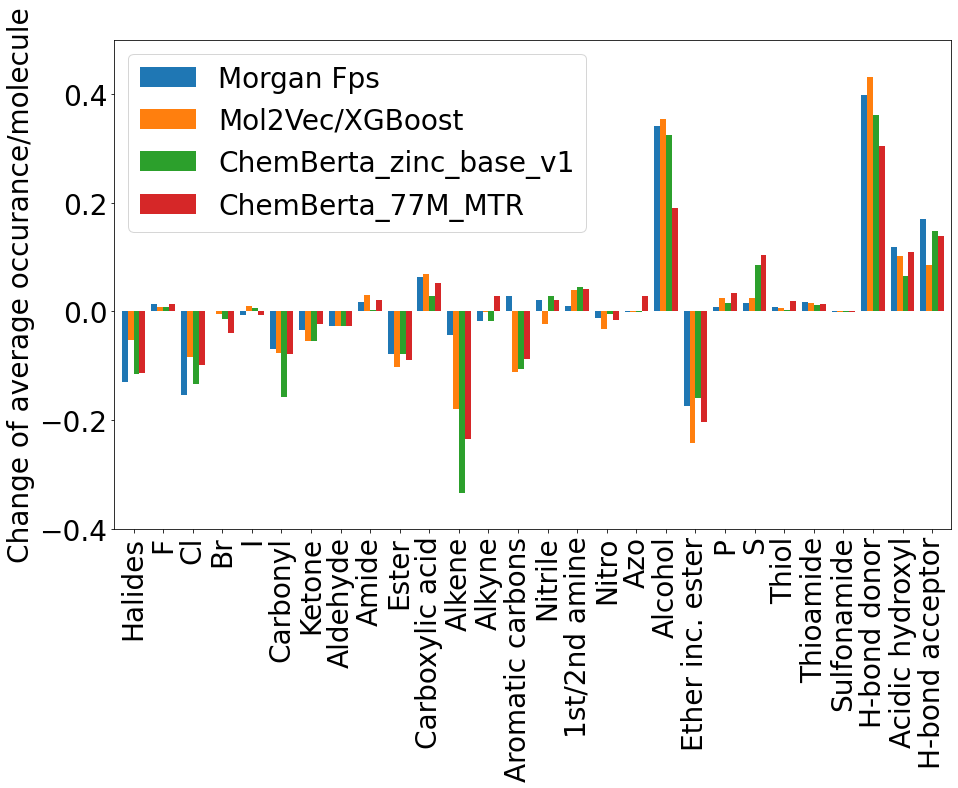

In [29]:
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge_change.plot.bar(figsize=(15,9), ylim = (-0.4, 0.5), width=0.8)
ax.set_ylabel("Change of average occurance/molecule", size=28)